In [ ]:
!pip install python-docx nltk scikit-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['text'] = df['review']

def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in ENGLISH_STOP_WORDS])

df['clean_text'] = df['text'].apply(preprocess)
df = df.sample(5000, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.833

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       506
           1       0.80      0.88      0.84       494

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



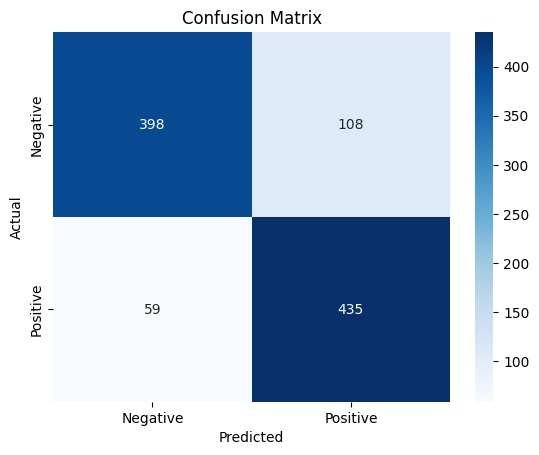

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
uploaded = files.upload()

Saving Lecture Review_Sample.docx to Lecture Review_Sample.docx


In [ ]:
from docx import Document
from google.colab import files

In [ ]:
def extract_text_docx(file_name):
    doc = Document(file_name)
    return "\n".join([para.text for para in doc.paragraphs])

In [ ]:
def predict_sentiment(text):
    cleaned = preprocess(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    proba = model.predict_proba(vec)[0][pred]
    return pred, proba * 100

In [ ]:
uploaded = files.upload()

uploaded_files = list(uploaded.keys())
if len(uploaded_files) != 2:
    print("Please upload exactly two .docx files.")
else:
    file1, file2 = uploaded_files[0], uploaded_files[1]

    text1 = extract_text_docx(file1)
    text2 = extract_text_docx(file2)

    pred1, conf1 = predict_sentiment(text1)
    pred2, conf2 = predict_sentiment(text2)

    label1 = "Positive " if pred1 == 1 else "Negative "
    label2 = "Positive " if pred2 == 1 else "Negative "

    print(f"{file1} → Sentiment: {label1} | Confidence: {conf1:.2f}%")
    print(f"{file2} → Sentiment: {label2} | Confidence: {conf2:.2f}%")

    if pred1 == pred2:
        print("\n Sentiments MATCH")
    else:
        print("\n Sentiments DO NOT match")

Saving Converstation_Sample of Student Video Lecture.docx to Converstation_Sample of Student Video Lecture (1).docx
Saving Positive_Review_Sample.docx to Positive_Review_Sample (1).docx
Converstation_Sample of Student Video Lecture (1).docx → Sentiment: Positive  | Confidence: 63.24%
Positive_Review_Sample (1).docx → Sentiment: Positive  | Confidence: 75.14%

 Sentiments MATCH
